In [2]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# Edad(Q1) Salario(Q25)

    

In [4]:
df = pd.read_csv('../files/df_a_usar_2.csv', index_col = 0)



In [5]:
df.shape

(25973, 242)

In [6]:
df_as = df.copy()
df_as.head(2)

,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [7]:
# mantenemos la columna index como tal.
df_as= df_as.set_index('index')
df_as.head(2)

,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,Q13,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [13]:
df_as.groupby('gender').ngroups, df_as.groupby('age').ngroups, df_as.groupby('anual_income_q25').ngroups


(5, 11, 26)

In [ ]:
# percentaje de valores nulos 
nulls = pd.DataFrame((df_as.isnull().sum() * 100) / df.shape[0]).reset_index()
nulls.head(17)

,index,0
0,time,0.000000
1,age,0.000000
2,gender,0.000000
3,country_q3,0.000000
4,education_q4,0.000000
5,role_q5,0.000000
6,experience_q6,0.000000
7,Q8,3.977207
8,Q11,4.824241
9,Q13,6.044739


In [14]:
df_as['anual_income_q25'].isnull().sum()

10582

In [16]:
df_as['anual_income_q25'].value_counts()

$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: anual_income_q25, dtype: int64

In [17]:
df_as['age'].value_counts()

25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: age, dtype: int64

        - dentro del conjunto de columnas de interés para nuestro estudio, vemos que existen nulos en las columnas sector_q20(37%), company_size:q21(37%), annual_income_q25(41% : equivalente a 10582 registros)

    -  Se puede observar que la grande mayoria está en un intervalo de los 18 a
    los 24 años. Sendo el intervalo de 25 a 29 años el que comporta mayor cantidad de encuestados

_________________________________________________________________________________________________________________

- Limpieza

In [18]:
# hay muchas columnas que no interesan, visualizamos y eliminamos:
df_as.columns

Index(['time', 'age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'Q8', 'Q11', 'Q13',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=241)

In [19]:
df_as = df_as.drop(columns =['Q26', 'Q33', 'Q35', 'Q41', 'Q9',  'Q12', 'Q14', 'Q16', 'Q17', 'Q24','Q32', 'Q34','Q18_Part_1',
 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4','Q18_Part_5','Q18_Part_6', 'Q18_OTHER', 'Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3',
 'Q19_Part_4', 'Q19_Part_5', 'Q19_OTHER','Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5',
 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER',
 'Q28', 'Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_OTHER', 'Q30_A_Part_1','Q30_A_Part_2',
 'Q30_A_Part_3','Q30_A_Part_4', 'Q30_A_Part_5', 'Q30_A_Part_6', 'Q30_A_Part_7', 'Q30_A_OTHER', 'Q31_A_Part_1',
 'Q31_A_Part_2', 'Q31_A_Part_3', 'Q31_A_Part_4', 'Q31_A_Part_5', 'Q31_A_Part_6', 'Q31_A_Part_7', 'Q31_A_Part_8',
 'Q31_A_Part_9', 'Q31_A_OTHER', 'Q36_A_Part_1', 'Q36_A_Part_2', 'Q36_A_Part_3', 'Q36_A_Part_4', 'Q36_A_Part_5',
 'Q36_A_Part_6', 'Q36_A_Part_7', 'Q36_A_OTHER','Q37_A_Part_1', 'Q37_A_Part_2', 'Q37_A_Part_3', 'Q37_A_Part_4',
 'Q37_A_Part_5', 'Q37_A_Part_6', 'Q37_A_Part_7', 'Q37_A_OTHER', 'Q38_A_Part_1','Q38_A_Part_2', 'Q38_A_Part_3',
 'Q38_A_Part_4', 'Q38_A_Part_5', 'Q38_A_Part_6', 'Q38_A_Part_7', 'Q38_A_Part_8', 'Q38_A_Part_9', 'Q38_A_Part_10',
 'Q38_A_Part_11', 'Q38_A_OTHER', 'Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6',
 'Q39_Part_7', 'Q39_Part_8', 'Q39_Part_9', 'Q39_OTHER', 'Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4',
 'Q40_Part_5', 'Q40_Part_6', 'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10', 'Q40_Part_11', 'Q40_OTHER',
 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 'Q42_Part_4', 'Q42_Part_5', 'Q42_Part_6', 'Q42_Part_7', 'Q42_Part_8',
 'Q42_Part_9', 'Q42_Part_10', 'Q42_Part_11', 'Q42_OTHER', 'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4',
 'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11',
 'Q27_B_OTHER',
 'Q29_B_Part_1',
 'Q29_B_Part_2',
 'Q29_B_Part_3',
 'Q29_B_Part_4',
 'Q29_B_OTHER',
 'Q30_B_Part_1',
 'Q30_B_Part_2',
 'Q30_B_Part_3',
 'Q30_B_Part_4',
 'Q30_B_Part_5',
 'Q30_B_Part_6',
 'Q30_B_Part_7',
 'Q30_B_OTHER',
 'Q31_B_Part_1',
 'Q31_B_Part_2',
 'Q31_B_Part_3',
 'Q31_B_Part_4',
 'Q31_B_Part_5',
 'Q31_B_Part_6',
 'Q31_B_Part_7',
 'Q31_B_Part_8',
 'Q31_B_Part_9',
 'Q31_B_OTHER',
 'Q32_B_Part_1',
 'Q32_B_Part_2',
 'Q32_B_Part_3',
 'Q32_B_Part_4',
 'Q32_B_Part_5',
 'Q32_B_Part_6',
 'Q32_B_Part_7',
 'Q32_B_Part_8',
 'Q32_B_Part_9',
 'Q32_B_Part_10',
 'Q32_B_Part_11',
 'Q32_B_Part_12',
 'Q32_B_Part_13',
 'Q32_B_Part_14',
 'Q32_B_Part_15',
 'Q32_B_Part_16',
 'Q32_B_Part_17',
 'Q32_B_Part_18',
 'Q32_B_Part_19',
 'Q32_B_Part_20',
 'Q32_B_OTHER',
 'Q34_B_Part_1',
 'Q34_B_Part_2',
 'Q34_B_Part_3',
 'Q34_B_Part_4',
 'Q34_B_Part_5',
 'Q34_B_Part_6',
 'Q34_B_Part_7',
 'Q34_B_Part_8',
 'Q34_B_Part_9',
 'Q34_B_Part_10',
 'Q34_B_Part_11',
 'Q34_B_Part_12',
 'Q34_B_Part_13',
 'Q34_B_Part_14',
 'Q34_B_Part_15',
 'Q34_B_Part_16',
 'Q34_B_OTHER',
 'Q36_B_Part_1',
 'Q36_B_Part_2',
 'Q36_B_Part_3',
 'Q36_B_Part_4',
 'Q36_B_Part_5',
 'Q36_B_Part_6',
 'Q36_B_Part_7',
 'Q36_B_OTHER',
 'Q37_B_Part_1',
 'Q37_B_Part_2',
 'Q37_B_Part_3',
 'Q37_B_Part_4',
 'Q37_B_Part_5',
 'Q37_B_Part_6',
 'Q37_B_Part_7',
 'Q37_B_OTHER',
 'Q38_B_Part_1',
 'Q38_B_Part_2',
 'Q38_B_Part_3',
 'Q38_B_Part_4',
 'Q38_B_Part_5',
 'Q38_B_Part_6',
 'Q38_B_Part_7',
 'Q38_B_Part_8',
 'Q38_B_Part_9',
 'Q38_B_Part_10',
 'Q38_B_Part_11',
 'Q38_B_OTHER'])


In [20]:
# algunas columnas que faltan eliminarlas
df_as = df_as.drop(columns =['Q8', 'Q11', 'Q13', 'Q15', 'Q22', 'Q23', 'Q7'])

In [21]:
df_as.shape
print(f'El df_as creado tiene {df_as.shape[0]} filas y {df_as.shape[1]} columnas.')

El df_as creado tiene 25973 filas y 10 columnas.


In [22]:
# fusionamos las categorias 'Nonbinary' y 'Prefer to self-describe' (depuración Gadea)
df_as['gender'] = df_as['gender'].replace({'Prefer to self-describe': 'NB', 'Nonbinary': 'NB', 'Prefer not to say': np.nan})
df_as['gender'].value_counts()

Man      20598
Woman     4890
NB         130
Name: gender, dtype: int64

 - Rectificamos el nombre de la columna
 Eliminamos el caracter '$'
 - Vemos que annual_income_q25 presenta valores en dólares y los pasamos a euros.
 - Añadimos una nueva columna - 'annual_incom€_q25' - que son los rangos en dólares de los salários convertidos a euros.

In [23]:
# rectificación nombre columna
df_as.rename(columns = {'anual_income_q25' : 'annual_income_q25'}, inplace = True)


In [24]:
# quitamos '$' 
df_as['annual_income_q25'] = df_as['annual_income_q25'].replace('$0-999','0-999')
df_as['annual_income_q25'] = df_as['annual_income_q25'].replace('>$1,000,000','>1,000,000')


In [25]:
df_as['annual_income_q25'].unique()

array(['25,000-29,999', '60,000-69,999', '0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>1,000,000',
       '$500,000-999,999'], dtype=object)

In [26]:
# lista con valores originales ['annual_income_q25']:

list_income = ['25,000-29,999', '60,000-69,999', '0-999', '30,000-39,999', np.nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>1,000,000',
       '$500,000-999,999']
 

In [27]:
# list = list_income sin rangos.

exchange_rate = 0.93            # fuente : https://www.oanda.com/currency-converter/en/?from=USD&to=EUR&amount=1  , 11.ene.23

new_list = []
list = [25000,29999, 60.000,69.999, 0000,999, 30.000,39.999, np.nan,
       15.000,19.999, 70.000,79.999, 2.000,2.999, 10.000,14.999,
       5.000,7.499, 20.000,24.999, 1.000,1.999, 100.000,124.999,
       7.500,9.999, 4.000,4.999, 40.000,49.999, 50.000,59.999,
       3.000,3.999, 300.000,499.999, 200.000,249.999,
       125.000,149.999, 250.000,299.999, 80.000,89.999,
       90.000,99.999, 150.000,199.999, 1.000000,
       500.000,999.999]                             
for i in list:
        new_list.append((i*exchange_rate))
print(new_list)       

[23250.0, 27899.07, 55.800000000000004, 65.09907, 0.0, 929.07, 27.900000000000002, 37.199070000000006, nan, 13.950000000000001, 18.59907, 65.10000000000001, 74.39907, 1.86, 2.78907, 9.3, 13.94907, 4.65, 6.97407, 18.6, 23.24907, 0.93, 1.8590700000000002, 93.0, 116.24907, 6.9750000000000005, 9.29907, 3.72, 4.64907, 37.2, 46.49907, 46.5, 55.79907000000001, 2.79, 3.7190700000000003, 279.0, 464.9990700000001, 186.0, 232.49907000000002, 116.25, 139.49907, 232.5, 278.99907, 74.4, 83.69907, 83.7, 92.99907, 139.5, 185.99907000000002, 0.93, 465.0, 929.9990700000001]


In [28]:
# lista con los valores del los rangos [annual_income_q25] convertidos a euros:
list_income_new = ['23,250-27,899', '55,800-65,099', '0-929,07', '27,900-37,199', np.nan,
                   '13,950-18,599', '65,100-74,399', '1,860-2,789', '9,300-13,949',
                   '4,650-6,974', '18,600-23,249', '930-1,859', '93,000-116,249',
                   '6,975-9,299', '3,720-4,649', '37,200-46,499', '46,500-55,799',
                   '2,790-3,719', '279,000-464,999', '186,000-232,499',
                   '116,250-139,499', '232,500-278,999', '74,400-83,699', '83,700-92,999', '139,500-185,999', '>930,000',
                   '465,000-929,999']

In [29]:
# creamos la nueva columna:
df_as['annual_incom€_q25'] = df_as['annual_income_q25'].replace(list_income, list_income_new)


In [30]:
df_as['annual_incom€_q25'].unique()

array(['23,250-27,899', '55,800-65,099', '0-929,07', '27,900-37,199', nan,
       '13,950-18,599', '65,100-74,399', '1,860-2,789', '9,300-13,949',
       '4,650-6,974', '18,600-23,249', '930-1,859', '93,000-116,249',
       '6,975-9,299', '3,720-4,649', '37,200-46,499', '46,500-55,799',
       '2,790-3,719', '279,000-464,999', '186,000-232,499',
       '116,250-139,499', '232,500-278,999', '74,400-83,699',
       '83,700-92,999', '139,500-185,999', '>930,000', '465,000-929,999'],
      dtype=object)

In [31]:
df_as.head()

,time,age,gender,country_q3,education_q4,role_q5,experience_q6,sector_q20,company_size_q21,annual_income_q25,annual_incom€_q25
index,,,,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","23,250-27,899"
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","55,800-65,099"
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",0-999,"0-929,07"
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees","30,000-39,999","27,900-37,199"
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Academics/Education,50-249 employees,"30,000-39,999","27,900-37,199"


In [32]:
df_as['annual_incom€_q25'].isnull().sum()

10582

In [33]:
income = (df_as['annual_incom€_q25'].value_counts()).reset_index()
income

,index,annual_incom€_q25
0,"0-929,07",3369
1,"930-1,859",969
2,"9,300-13,949",950
3,"27,900-37,199",741
4,"93,000-116,249",725
5,"4,650-6,974",699
6,"46,500-55,799",697
7,"37,200-46,499",688
8,"18,600-23,249",587
9,"1,860-2,789",575


In [34]:

df_as['age'].value_counts()

25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: age, dtype: int64

In [35]:
df_income_country = pd.DataFrame(df_as.groupby(['annual_incom€_q25'])['country_q3'].value_counts())
df_income_country.head(20)


country_q3
annual_incom€_q25 country_q3                              
0-929,07          India                                978
                  Other                                248
                  Nigeria                              196
                  Egypt                                150
                  Pakistan                             143
                  United States of America             133
                  Indonesia                            115
                  China                                106
                  Russia                                92
                  Brazil                                82
                  Turkey                                82
                  Japan                                 79
                  Bangladesh                            71
                  Viet Nam                              65
                  Iran, Islamic Republic of...          47
                  Kenya                                 46
                  Mexico                                35
                  South Korea                           33
                  Colombia                              31
                  Morocco                               31

In [38]:
# observamos que los estudiantes están en mayor números en el estudio (6804 registros), y de eses, 3542 tienen edad entre 18 y 21 años,lo que 
# probablemente afectará la variable salario.
age_role_cross = pd.crosstab(index = df_as['age'], columns = df_as['role_q5'], margins = True).T
age_role_cross

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+,All
role_q5,,,,,,,,,,,,
Business Analyst,45,119,200,170,135,107,72,54,27,35,4,968
Currently not employed,140,444,514,264,185,138,97,81,51,53,19,1986
DBA/Database Engineer,9,20,17,30,22,21,11,18,10,12,1,171
Data Analyst,191,419,588,420,280,163,105,67,32,28,8,2301
Data Engineer,41,114,146,104,92,66,45,28,19,11,2,668
Data Scientist,343,594,907,625,414,317,172,117,66,50,11,3616
Developer Relations/Advocacy,7,12,12,14,19,9,6,13,1,4,2,99
Machine Learning Engineer,239,336,377,221,130,82,39,36,20,18,1,1499
Other,52,190,410,418,360,275,250,166,125,115,32,2393


In [49]:
df_as.stb.freq(['role_q5'], thresh=80)

,role_q5,count,percent,cumulative_count,cumulative_percent
0,Student,6804,26.196435,6804,26.196435
1,Data Scientist,3616,13.922150,10420,40.118585
2,Software Engineer,2449,9.429022,12869,49.547607
3,Other,2393,9.213414,15262,58.761021
4,Data Analyst,2301,8.859200,17563,67.620221
5,Currently not employed,1986,7.646402,19549,75.266623
6,others,6424,24.733377,25973,100.000000


In [ ]:
df_as.stb.freq(['annual_incom€_q25'], thresh=65)

,annual_incom€_q25,count,percent,cumulative_count,cumulative_percent
0,"0-929,07",3369,21.889416,3369,21.889416
1,"930-1,859",969,6.295887,4338,28.185303
2,"9,300-13,949",950,6.172438,5288,34.357742
3,"27,900-37,199",741,4.814502,6029,39.172244
4,"93,000-116,249",725,4.710545,6754,43.882789
5,"4,650-6,974",699,4.541615,7453,48.424404
6,"46,500-55,799",697,4.528621,8150,52.953024
7,"37,200-46,499",688,4.470145,8838,57.423169
8,"18,600-23,249",587,3.813917,9425,61.237087
9,"1,860-2,789",575,3.735950,10000,64.973036


In [ ]:
df_as.stb.freq(['age'], thresh=65)

,age,count,percent,cumulative_count,cumulative_percent
0,25-29,4931,18.985100,4931,18.985100
1,18-21,4901,18.869595,9832,37.854695
2,22-24,4694,18.072614,14526,55.927309
3,others,11447,44.072691,25973,100.000000


- curiosidad 'DataAnalyst'

In [45]:
df_analyst = df_as[df_as['role_q5'] == 'Data Analyst']
df_analyst

,time,age,gender,country_q3,education_q4,role_q5,experience_q6,sector_q20,company_size_q21,annual_income_q25,annual_incom€_q25
index,,,,,,,,,,,
16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Energy/Mining,"1000-9,999 employees","2,000-2,999","1,860-2,789"
32,171,22-24,NB,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,Manufacturing/Fabrication,250-999 employees,NaN,NaN
33,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Non-profit/Service,0-49 employees,"7,500-9,999","6,975-9,299"
46,1524,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,Computers/Technology,0-49 employees,0-999,"0-929,07"
52,866,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,Manufacturing/Fabrication,250-999 employees,"25,000-29,999","23,250-27,899"
...,...,...,...,...,...,...,...,...,...,...,...
25954,474,25-29,Man,India,Professional doctorate,Data Analyst,< 1 years,Online Service/Internet-based Services,250-999 employees,0-999,"0-929,07"
25959,96354,18-21,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Academics/Education,0-49 employees,0-999,"0-929,07"
25965,40250,18-21,Man,India,Master’s degree,Data Analyst,1-3 years,NaN,NaN,NaN,NaN


In [55]:
 # pd.crosstab(index = df_analyst['role_q5'], columns = df_analyst['experience_q6'], columns = df_analyst['annual_income_q25'],margins = True)
pd.crosstab(index = df_analyst['annual_incom€_q25'], columns =  df_analyst['experience_q6'],margins = True)


experience_q6,1-3 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code,All
annual_incom€_q25,,,,,,,,
"0-929,07",176,10,5,63,18,209,48,529
"1,860-2,789",27,4,4,11,6,21,5,78
"116,250-139,499",2,2,2,4,2,2,0,14
"13,950-18,599",31,4,1,11,7,17,5,76
"139,500-185,999",2,2,1,1,3,1,0,10
"18,600-23,249",25,6,0,11,16,15,3,76
"186,000-232,499",1,0,0,0,2,1,0,4
"2,790-3,719",29,1,1,10,10,18,3,72
"23,250-27,899",16,5,3,8,4,11,7,54


In [ ]:
# ver relacion entre las categoricas edad, genero y salario
age_gender = pd.crosstab(index = df_as['gender'], columns = df_as['age'], margins = True)


In [ ]:
inc_gender = pd.crosstab(index = df_as['gender'], columns = df_as['annual_incom€_q25'], margins = True).T

In [ ]:
age_role = pd.crosstab(index = df_as['age'], columns = df_as['role_q5'], margins = True).T

In [ ]:
age_inc = pd.crosstab(index = df_as['age'], columns = df_as['annual_incom€_q25'], margins = True).T

In [ ]:
inc_role = pd.crosstab(index = df_as['annual_incom€_q25'], columns = df_as['role_q5'], margins = True).T

In [ ]:
age_gender = pd.DataFrame(df_as.groupby(['gender'])['age'].value_counts())
age_gender

age
gender age        
Man    25-29  3859
       18-21  3696
       22-24  3643
       30-34  2765
       35-39  1993
       40-44  1537
       45-49  1171
       50-54   811
       55-59   509
       60-69   504
       70+     110
NB     18-21    28
       30-34    24
       22-24    22
       25-29    17
       35-39    14
       40-44     5
       45-49     5
       55-59     4
       60-69     4
       70+       4
       50-54     3
Woman  18-21  1117
       25-29   994
       22-24   963
       30-34   618
       35-39   455
       40-44   317
       45-49   175
       50-54   136
       55-59    72
       60-69    35
       70+       8

- Frecuencia relativa muestra

In [ ]:
# ver la frecuencia relativa por intervalo de edad
df_age_freq = pd.DataFrame(df_as['age'].value_counts()/len(df_as['age']))*100
 #df_age_frecuencia_rel= (columns : 'age', '%')
round(df_age_freq, 0)

,age
25-29,19.0
18-21,19.0
22-24,18.0
30-34,13.0
35-39,10.0
40-44,7.0
45-49,5.0
50-54,4.0
55-59,2.0
60-69,2.0


In [ ]:
df_income_freq= pd.DataFrame(df_as['annual_incom€_q25'].value_counts()/len(df_as['annual_incom€_q25']))*100
round(df_income_freq, 0)

,annual_incom€_q25
"0-929,07",13.0
"930-1,859",4.0
"9,300-13,949",4.0
"27,900-37,199",3.0
"93,000-116,249",3.0
"4,650-6,974",3.0
"46,500-55,799",3.0
"37,200-46,499",3.0
"18,600-23,249",2.0
"1,860-2,789",2.0


In [ ]:
df_gender_freq = pd.DataFrame(df_as['gender'].value_counts()/len(df_as['gender']))*100
round(df_gender_freq, 0)

,gender
Man,79.0
Woman,19.0
NB,1.0


 - Graficos

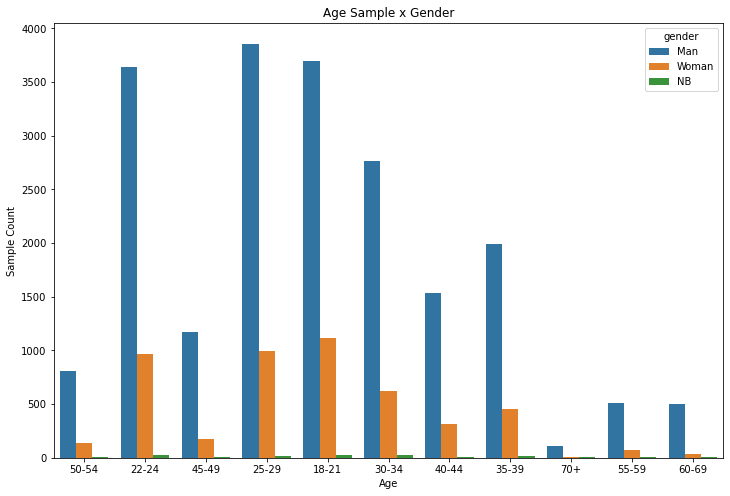

In [ ]:
# histograma edad
plt.figure(figsize=(12,8))
fig = sns.countplot(x = 'age', data = df_as, hue = 'gender')
fig.set(xlabel = 'Age', ylabel = 'Sample Count')
fig.set_title('Age Sample x Gender')
plt.show()

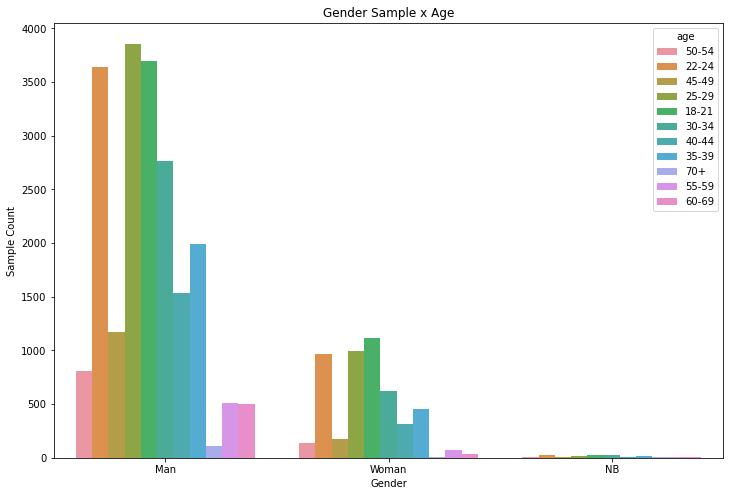

In [ ]:
# countplot para visualizar la distribución de genero por la muestra
plt.figure(figsize=(12,8))
fig = sns.countplot(x = 'gender', data = df_as, hue = 'age')
fig.set(xlabel = 'Gender', ylabel = 'Sample Count')
fig.set_title('Gender Sample x Age')
plt.show()

In [ ]:
plt.figure(figsize = (15,8))
fig = sns.histplot (x = 'annual_incom€_q25', data = df_as, hue = 'gender')
fig.set(xlabel = 'Income', ylabel = 'Annual Income')
fig.set_title('Relation between Income x gender')
plt.xticks(rotation = 60);

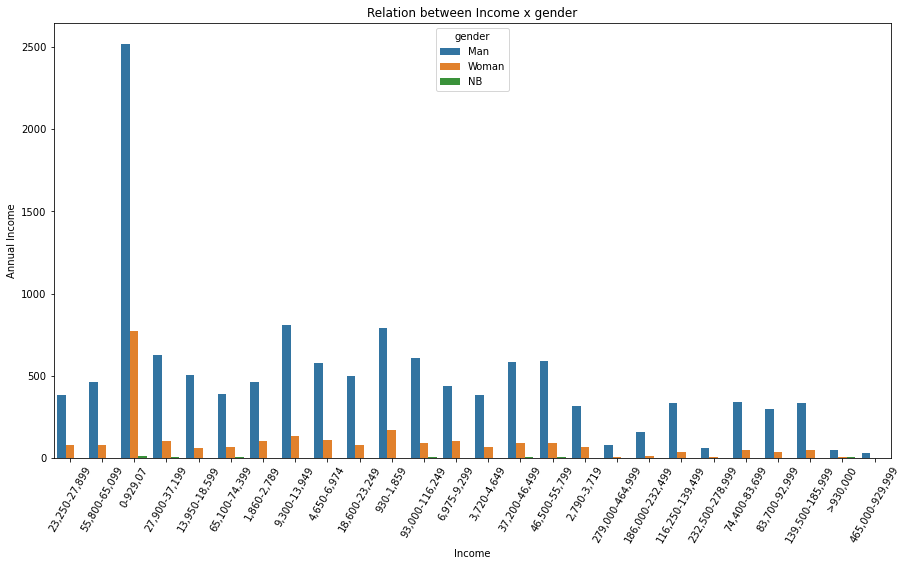

In [ ]:
plt.figure(figsize = (15,8))
fig = sns.countplot (x = 'annual_incom€_q25', data = df_as, hue = 'gender')
fig.set(xlabel = 'Income', ylabel = 'Annual Income')
fig.set_title('Relation between Income x gender')
plt.xticks(rotation = 60);


In [11]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_as['annual_incom€_q25'],data = df_as, hue='gender', kde=True)
fig.set(xlabel = 'Income', ylabel = 'Sample Count')
fig.set_title('Relation Income x gender')
plt.xticks(rotation= 75)
plt.show()

KeyError: 'annual_incom€_q25'

<Figure size 720x576 with 0 Axes>

In [ ]:
plt.figure()
plt.pie(df_as['age'], labels=df_age_freq['age'], autopct='%1.2f%%')
plt.legend(df_as['age'])
plt.title('Fig 1. Distribución de la muestra por género')
plt.show();

KeyError: ''

<Figure size 432x288 with 0 Axes>

___________________________________________________________________________________________________________________________________

In [ ]:
age_role = pd.crosstab(index = df_as['age'], columns = df_as['role_q5'], margins = True).T

NameError: name 'pd' is not defined

In [ ]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x = 'role_q5', data = df_as, hue = 'annual_income_q25')
fig.set(xlabel = 'Gender', ylabel = 'Sample Count')
fig.set_title('Gender Sample x Age')
plt.show()